In [2]:
import numpy as np


In [3]:
from keras.datasets import mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#printing the shapes of the vectors 
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))
num_train_samples = 5000
train_images = train_images[:num_train_samples]
train_labels = train_labels[:num_train_samples]

# Printing the shapes of the subsets
print('train_images_subset: ' + str(train_images.shape))
print('train_labels_subset: ' + str(train_labels.shape))

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)
train_images_subset: (5000, 28, 28)
train_labels_subset: (5000,)


In [4]:
print(type(train_images))

<class 'numpy.ndarray'>


In [5]:
# Preprocess training and test images
train_images = train_images.reshape((5000, 784))  
train_images = train_images.astype('float32') / 255  # Normalize pixel values

test_images = test_images.reshape((10000, 784))  # Flatten images (10000, 28, 28) -> (10000, 784)

test_images = test_images.astype('float32') / 255  # Normalize pixel values

In [6]:
#printing the shapes of the vectors 
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

train_images: (5000, 784)
train_labels: (5000,)
test_images:  (10000, 784)
test_labels:  (10000,)


In [7]:
train_labels=train_labels.reshape(5000,1)
test_labels = test_labels.reshape(10000,1)
print('train_labels: ' + str(train_labels.shape))
print('test_labels:  '  + str(test_labels.shape))

train_labels: (5000, 1)
test_labels:  (10000, 1)


In [8]:
print(type(train_images[4]))

<class 'numpy.ndarray'>


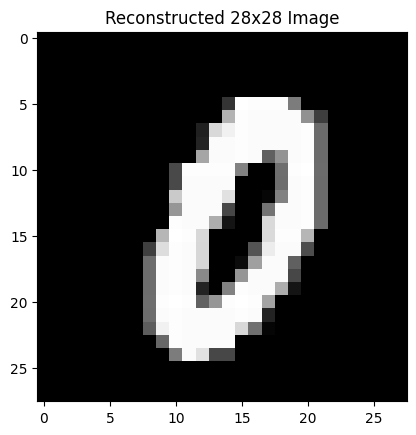

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 28x28 image (you would replace this with your image data)
image_flattened = train_images[34]

# Reconstruct the image back into a 28x28 matrix
image_reconstructed = image_flattened.reshape(28, 28)

# Display the reconstructed image
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed 28x28 Image')
plt.show()



In [11]:
print(min(image_flattened))
print(max(image_flattened))
b0 = 0
b1 = 0
for element in image_flattened:
    if element == 0:
        b0 += 1
    else:
        b1 += 1
print(b0,b1)

0.0
1.0
601 183


In [12]:
print(train_labels)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [10]:
input_size = 1 # 28 * 28 = 784

hidden_size = 128  # Example: Using 128 neurons in the hidden layer
hidden_size2 = 64
# Size of the output layer (number of output units)
output_size = 784  # 28 * 28 = 784 (output image size)

# Print the defined variables
print(f"Size of input layer: {input_size}")
print(f"Size of hidden layer: {hidden_size}")
print(f"Size of hidden layer 2: {hidden_size2}")
print(f"Size of output layer: {output_size}")

Size of input layer: 1
Size of hidden layer: 128
Size of hidden layer 2: 64
Size of output layer: 784


In [11]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.zeros((hidden_size, input_size))
    b1 = np.zeros((hidden_size, 1))
    W2 = np.zeros((hidden_size2, hidden_size))
    b2 = np.zeros((hidden_size2, 1))
    W3 = np.zeros((output_size, hidden_size2))
    b3 = np.zeros((output_size, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, 'b3': b3}
    return parameters

parameters = initialize_parameters(input_size, hidden_size, output_size)

In [14]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

In [15]:
print(parameters['W2'].shape)

(784, 128)


In [16]:
# sigmoid activation function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))


In [13]:

def relu(Z):
    return np.maximum(0,Z)

In [14]:
def mean_squared_error_loss(A2, y):
    m = y.shape[0]
    loss = (1 / m) * np.sum(np.square(A2.T - y))
    return loss

In [20]:
print(type(train_labels))
c = parameters['b1']
print(type(c))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
# forward propagation
def forward_propagation(X, parameters):
    # retrieve the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # compute the activation of the hidden layer
    Z1 = np.dot(W1, X.T) + b1
    # print(Z1.shape)
    A1 = relu(Z1)
    # print(A1.shape)
    # compute the activation of the output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    # print(Z2.shape)
    # print(A2.shape)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, 'Z3': Z3, 'A3':A3}
    
    return A3, cache



In [22]:
A3, cache = forward_propagation(train_labels, parameters)

In [23]:
print(A3.shape)

(784, 5000)


In [24]:
print(train_images.shape)
print(A3.shape)
a1 = cache['A1']
print(parameters['W2'].shape)
print(a1.shape)

(5000, 784)
(784, 5000)
(784, 128)
(128, 5000)


In [16]:
# binary cross-entropy loss function
def binary_cross_entropy_loss(A3, y):
    epsilon = 1e-8
    m = y.shape[0]
    # loss = -(1/m) * np.sum(y*np.log(A2.T) + (1-y)*np.log(1-A2.T))
    loss = -(1/m) * np.sum(y * np.log(A3.T + epsilon) + (1 - y) * np.log(1 - A3.T + epsilon))
    return loss

In [26]:
print(cache['A2'].shape)

(784, 5000)


In [27]:
print(parameters['W2'].shape)

(784, 128)


In [20]:
import numpy as np

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation for a neural network with two hidden layers.
    
    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2", "Z3", "A3"
    X -- input data of shape (input_size, m)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    
    # Compute gradients
    dZ3 = A3 - Y.T
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    
    dZ2 = np.dot(W3.T, dZ3) * (A2 * (1 - A2))  # derivative of sigmoid
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))  # derivative of sigmoid
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    # Store gradients in a dictionary
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads


In [37]:
gradients = backward_propagation(parameters, cache, train_labels, train_images)

In [38]:
print(gradients['db1'].shape)
print(gradients['db2'].shape)

(128, 1)
(784, 1)


In [21]:
def update_parameters(parameters, gradients, learning_rate):
    """
    Update parameters using gradient descent for a neural network with two hidden layers.
    
    Arguments:
    parameters -- python dictionary containing your parameters (W1, b1, W2, b2, W3, b3)
    gradients -- python dictionary containing your gradients (dW1, db1, dW2, db2, dW3, db3)
    learning_rate -- the learning rate used in the update rule
    
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    dW3 = gradients["dW3"]
    db3 = gradients["db3"]
    
    # Retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    # Store updated parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    return parameters


In [23]:
# train the neural network
def train(X, y, num_iterations, learning_rate):
    # initialize the weights and biases
    parameters = initialize_parameters(input_size, 512, output_size)
    
    for i in range(num_iterations):
        # forward propagation
        A3, cache = forward_propagation(X, parameters)
        
        # compute the loss
        loss = binary_cross_entropy_loss(A3, y)
        
        # backward propagation
        gradients = backward_propagation(parameters, cache, X, y)
        
        # update the parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        # if i % 1000:
        print(f"iteration {i}: loss = {loss}")
    
    return parameters

parameters = train(train_labels, train_images, num_iterations=400, learning_rate= 0.001)

iteration 0: loss = 543.4273740751004
iteration 1: loss = 234.14634276691447
iteration 2: loss = 224.30754383658294
iteration 3: loss = 219.55891345590484
iteration 4: loss = 216.71328286565037
iteration 5: loss = 214.8188000495359
iteration 6: loss = 213.46898942386133
iteration 7: loss = 212.46000646328807
iteration 8: loss = 211.67827552883477
iteration 9: loss = 211.05551185106688
iteration 10: loss = 210.5482092441369
iteration 11: loss = 210.12734911530117
iteration 12: loss = 209.77284290686475
iteration 13: loss = 209.4703488572896
iteration 14: loss = 209.20935860837548
iteration 15: loss = 208.9819997583188
iteration 16: loss = 208.78226034140593
iteration 17: loss = 208.6054715227448
iteration 18: loss = 208.4479535518982
iteration 19: loss = 208.30676791690277
iteration 20: loss = 208.17954033550663
iteration 21: loss = 208.06433205970094
iteration 22: loss = 207.95954479433163
iteration 23: loss = 207.8638494256869
iteration 24: loss = 207.77613189119165
iteration 25: loss

In [41]:
def predict(parameters, label):
    # Prepare input data (reshape label into a column vector)
    
    # Perform forward propagation to get output from the neural network
    output, cache = forward_propagation(label, parameters)
    
    # Reshape the output into a 28x28 image
    image = output.reshape((28, 28))
    
    return image

# Example usage:
label = np.array([[2]])  # Assuming train_labels contains the label you want to predict


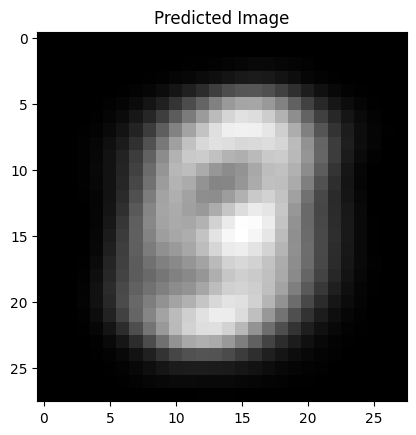

In [42]:
predicted_image = predict(parameters, label)

# Display the predicted image using matplotlib
plt.imshow(predicted_image, cmap='gray')
plt.title("Predicted Image")
plt.show()